In [73]:
import pyvista as pv
import skimage as sk
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve, gaussian_filter
import cv2

In [41]:
dots = sk.io.imread('./../3Dtotal_epithelial_shape.tif')
small_dots = dots[310,:, :]

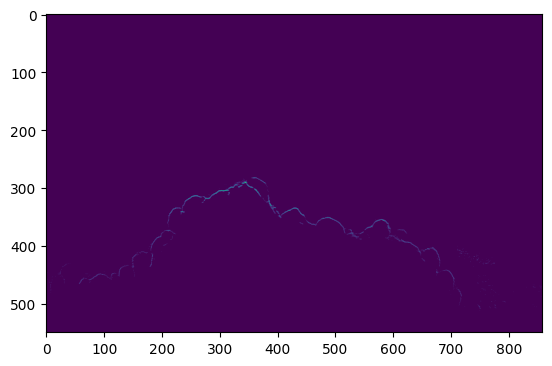

In [71]:
plt.imshow(small_dots)

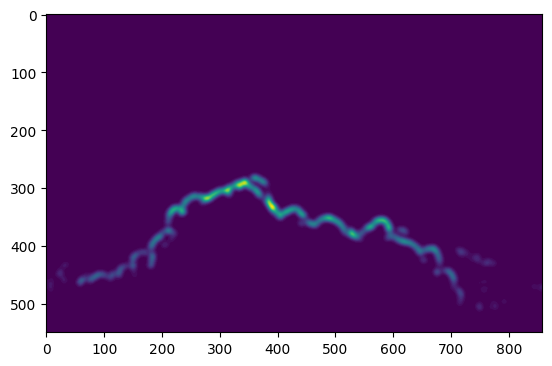

In [97]:
def apply_bilateral_filter(img):
    # The second parameter is the filter diameter, controlling the size of the neighborhood used for filtering.
    # The third parameter is the sigma values, controlling the standard deviation for color space and coordinate space.
    filtered_img = cv2.bilateralFilter(gaussian_filter(img*30, 4), d=9, sigmaColor=60, sigmaSpace=60)
    return filtered_img

filtered_img = apply_bilateral_filter(small_dots.astype(np.uint8))

plt.imshow(filtered_img)

In [98]:
points = np.column_stack(np.where(filtered_img))

In [99]:
print(points)

[[273 358]
 [273 359]
 [273 360]
 ...
 [514 749]
 [514 750]
 [514 751]]


In [40]:

cloud = pv.PolyData(points)
cloud.plot()

volume = cloud.delaunay_3d(alpha=3.)
shell = volume.extract_geometry()
shell.plot()

/home/ppujol@ibec.local/python_codes/light_sheet_domes/pynapari/lib/python3.10/site-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


ValueError: Points array must contain three values per point. Shape is (4945, 2) and should be (X, 3)